In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import glob
import os

In [2]:
# Ruta de los archivos JSON
ruta = r"C:\Users\User\Desktop\SOYHENRY\Trabajo Grupal\Dataset\Google\reviews-estados\review-Nebraska"

# Lista de archivos JSON en la carpeta
archivos_json = glob.glob(os.path.join(ruta, "*.json"))

# Cargar los JSON correctamente
df_list = []
for archivo in archivos_json:
    try:
        df_temp = pd.read_json(archivo, lines=True)  # Usa lines=True para JSON línea por línea
        df_list.append(df_temp)
    except ValueError as e:
        print(f"Error al leer {archivo}: {e}")

# Concatenar los dataframes
df = pd.concat(df_list, ignore_index=True)

In [3]:
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.088468e+20,Dan Grundy,1608331653332,5,For give me for not catching the managers name...,None,None,0x8793f2b4d692a433:0xc4d08ac32475203
1,1.161914e+20,dominick vacura,1627079809988,5,I've got shades!,None,None,0x8793f2b4d692a433:0xc4d08ac32475203
2,1.089856e+20,Cody Albers,1533832546055,4,Went here to see if I could get my glasses adj...,None,None,0x8793f2b4d692a433:0xc4d08ac32475203
3,1.169268e+20,Markus Farmer,1559062491880,5,Very helpful with questions. More Versace plea...,None,None,0x8793f2b4d692a433:0xc4d08ac32475203
4,1.147214e+20,james spevak,1526077661056,5,Pretty good place to look for sunglasses. But ...,None,None,0x8793f2b4d692a433:0xc4d08ac32475203


In [4]:
# Cantidad de filas y columnas
df.shape

(1817866, 8)

In [5]:
# Ver los tipos de datos de cada columna
print(df.dtypes)

user_id    float64
name        object
time         int64
rating       int64
text        object
pics        object
resp        object
gmap_id     object
dtype: object


In [6]:
df.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

In [7]:
# Convertir las columnas  a tipo 'string'
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('string')

In [8]:
df.duplicated().sum()

22312

In [9]:
# Filas duplicadas
duplicadas = df[df.duplicated(keep=False)]

# Ordenamos por todas las columnas para que se vean juntas
duplicadas = duplicadas.sort_values(by=df.columns.tolist())

# Mostramos el resultado
print(duplicadas)

              user_id              name           time  rating  \
102764   1.000006e+20  Siobhan McMullen  1554516888800       5   
102777   1.000006e+20  Siobhan McMullen  1554516888800       5   
1504943  1.000006e+20  Siobhan McMullen  1554581521817       4   
1504948  1.000006e+20  Siobhan McMullen  1554581521817       4   
1498442  1.000014e+20      Glenda Evans  1573405523252       5   
...               ...               ...            ...     ...   
534718   1.184440e+20    Shannon McCool  1539281940291       5   
299072   1.184440e+20    Shannon McCool  1548033699445       5   
299075   1.184440e+20    Shannon McCool  1548033699445       5   
1549501  1.184467e+20      Cullen Scism  1581740504044       1   
1549512  1.184467e+20      Cullen Scism  1581740504044       1   

                                                      text  pics  resp  \
102764                                    Love this place!  <NA>  <NA>   
102777                                    Love this place! 

In [10]:
# Eliminar filas duplicadas
df = df.drop_duplicates()

In [11]:
# Verificar la cantidad de valores nulos por columna
df.isnull().sum()

user_id          0
name             0
time             0
rating           0
text        869600
pics       1761751
resp       1589385
gmap_id          0
dtype: int64

In [12]:
# Estadísticas descriptivas para columnas numéricas
df.describe() 

,user_id,time,rating
count,1.795554e+06,1.795554e+06,1.795554e+06
mean,1.092155e+20,1.550890e+12,4.287410e+00
std,5.315366e+18,3.927297e+10,1.054388e+00
min,1.000004e+20,1.186797e+12,1.000000e+00
25%,1.046141e+20,1.525009e+12,4.000000e+00
50%,1.092019e+20,1.553207e+12,5.000000e+00
75%,1.138593e+20,1.577913e+12,5.000000e+00
max,1.184467e+20,1.631053e+12,5.000000e+00


In [13]:
outliers = pd.DataFrame()

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers_col = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
    outliers = pd.concat([outliers, outliers_col])

print(f"Total de outliers detectados: {len(outliers)}")

Total de outliers detectados: 146072


In [14]:
# Ver de qué columnas vienen los outliers
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    cantidad = df[(df[col] < lim_inf) | (df[col] > lim_sup)].shape[0]
    print(f"{col}: {cantidad} outliers")

user_id: 0 outliers
time: 10991 outliers
rating: 135081 outliers


In [15]:
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
print("\nFechas convertidas:\n", df[['time', 'fecha']].head())


Fechas convertidas:
             time                   fecha
0  1608331653332 2020-12-18 22:47:33.332
1  1627079809988 2021-07-23 22:36:49.988
2  1533832546055 2018-08-09 16:35:46.055
3  1559062491880 2019-05-28 16:54:51.880
4  1526077661056 2018-05-11 22:27:41.056


In [16]:
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,fecha
0,1.088468e+20,Dan Grundy,1608331653332,5,For give me for not catching the managers name...,<NA>,<NA>,0x8793f2b4d692a433:0xc4d08ac32475203,2020-12-18 22:47:33.332
1,1.161914e+20,dominick vacura,1627079809988,5,I've got shades!,<NA>,<NA>,0x8793f2b4d692a433:0xc4d08ac32475203,2021-07-23 22:36:49.988
2,1.089856e+20,Cody Albers,1533832546055,4,Went here to see if I could get my glasses adj...,<NA>,<NA>,0x8793f2b4d692a433:0xc4d08ac32475203,2018-08-09 16:35:46.055
3,1.169268e+20,Markus Farmer,1559062491880,5,Very helpful with questions. More Versace plea...,<NA>,<NA>,0x8793f2b4d692a433:0xc4d08ac32475203,2019-05-28 16:54:51.880
4,1.147214e+20,james spevak,1526077661056,5,Pretty good place to look for sunglasses. But ...,<NA>,<NA>,0x8793f2b4d692a433:0xc4d08ac32475203,2018-05-11 22:27:41.056


# Analisis de Rating

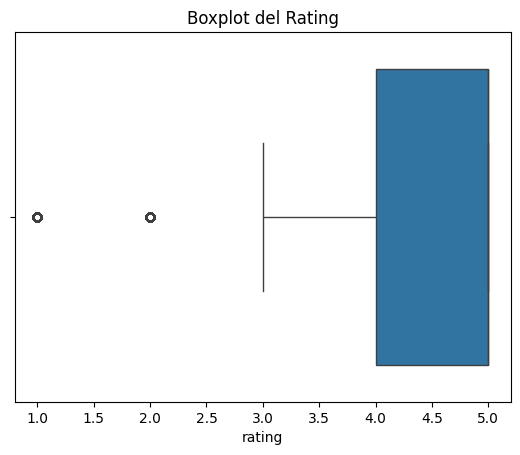

In [17]:
sns.boxplot(x='rating', data=df)
plt.title('Boxplot del Rating')
plt.show()

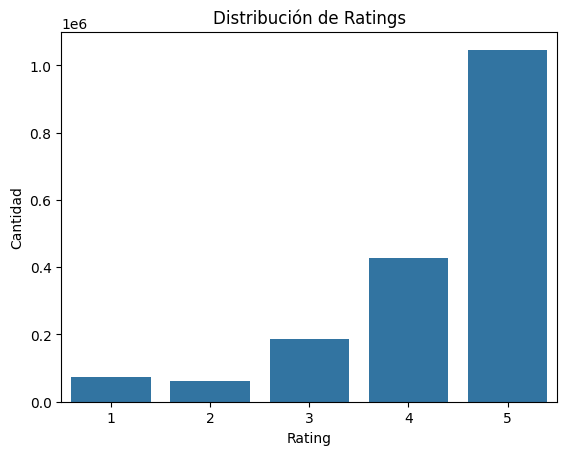

In [18]:
sns.countplot(x='rating', data=df)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.show()

In [19]:
# Contar cantidad de cada rating
rating_counts = df['rating'].value_counts().sort_index()

# Calcular porcentaje
rating_percentage = (rating_counts / len(df)) * 100

# Crear la tabla combinada
tabla_rating = pd.DataFrame({
    'Rating': rating_counts.index,
    'Cantidad': rating_counts.values,
    'Porcentaje (%)': rating_percentage.round(2)
})

# Mostrar la tabla
print(tabla_rating)

        Rating  Cantidad  Porcentaje (%)
rating                                  
1            1     74463            4.15
2            2     60618            3.38
3            3    185586           10.34
4            4    428615           23.87
5            5   1046272           58.27


Análisis:

Más del 80% de las reseñas tienen 4 o 5 estrellas → fuerte tendencia positiva.

Solo el 7% son críticas negativas (1 o 2 estrellas).

El valor más común es 5 estrellas, lo que podría indicar alta satisfacción.

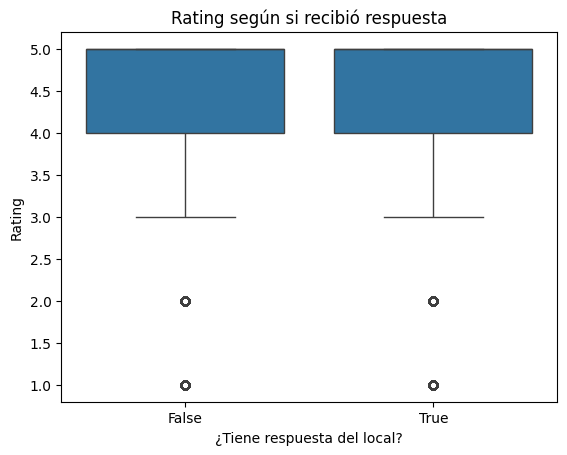

In [20]:
df['tiene_resp'] = df['resp'].notna()
sns.boxplot(x='tiene_resp', y='rating', data=df)
plt.title("Rating según si recibió respuesta")
plt.xlabel("¿Tiene respuesta del local?")
plt.ylabel("Rating")
plt.show()

Análisis:

No se muestra diferencias en la variacion de rating y la respuesta recibida

# Análisis de Review

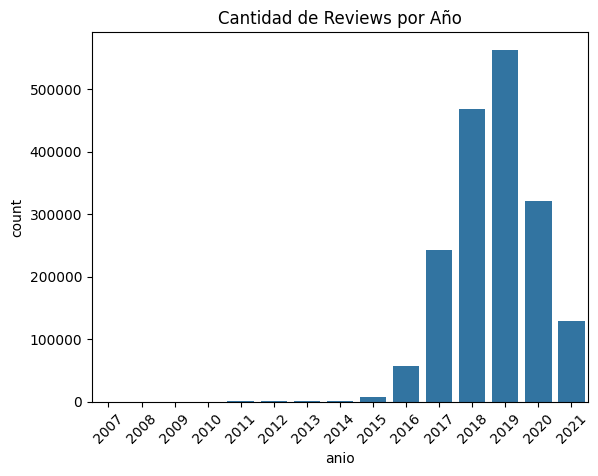

In [21]:
df['anio'] = df['fecha'].dt.year
sns.countplot(x='anio', data=df)
plt.title('Cantidad de Reviews por Año')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Asegurate de tener la columna 'anio' creada desde la fecha
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
df['anio'] = df['fecha'].dt.year

# Contar reviews por año
reviews_por_anio = df['anio'].value_counts().sort_index()

# Crear la tabla
tabla_reviews_anio = pd.DataFrame({
    'Año': reviews_por_anio.index,
    'Cantidad de Reviews': reviews_por_anio.values
})

# Mostrar la tabla
print(tabla_reviews_anio)

     Año  Cantidad de Reviews
0   2007                   11
1   2008                    8
2   2009                   28
3   2010                  496
4   2011                 1018
5   2012                 1205
6   2013                 1663
7   2014                 2204
8   2015                 7973
9   2016                56901
10  2017               243035
11  2018               468168
12  2019               562847
13  2020               321218
14  2021               128779


Análisis:

Se muestra un fuerte crecimiento desde 2016, con picos en 2018 y 2019.
Máximo en 2019: más de 560.000 reviews.
Caída en 2020 y 2021, posiblemente relacionada con la pandemia (COVID-19 afectó la movilidad y el turismo).
Antes de 2016, el volumen de reseñas era muy bajo.

In [23]:
total_reviews = len(df)

text_count = df['text'].notna().sum()
pics_count = df['pics'].notna().sum()
resp_count = df['resp'].notna().sum()

print(f"Reviews con texto: {text_count} ({(text_count / total_reviews * 100):.2f}%)")
print(f"Reviews con fotos: {pics_count} ({(pics_count / total_reviews * 100):.2f}%)")
print(f"Reviews con respuesta: {resp_count} ({(resp_count / total_reviews * 100):.2f}%)")

Reviews con texto: 925954 (51.57%)
Reviews con fotos: 33803 (1.88%)
Reviews con respuesta: 206169 (11.48%)


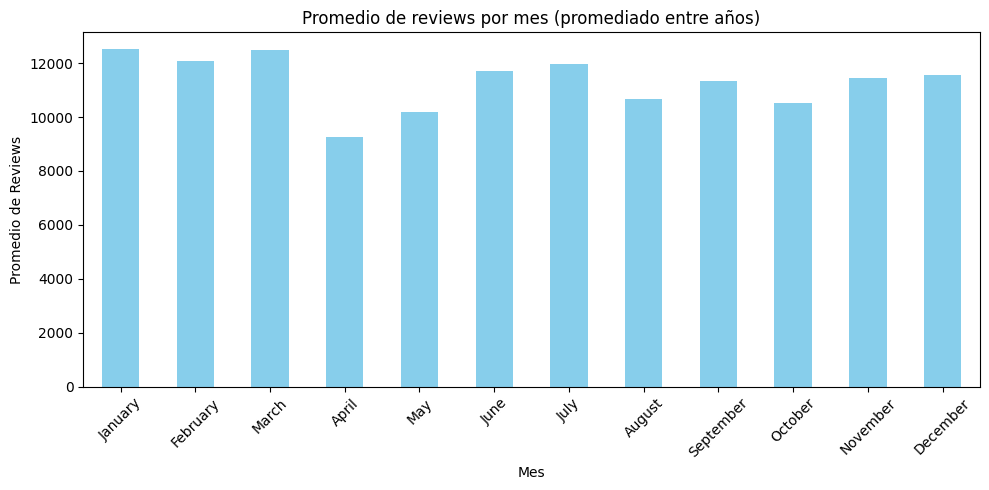

In [24]:
# Asegurar que las fechas están en formato datetime
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
df['anio'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month

# Agrupar por año y mes para contar reviews
grupo_anio_mes = df.groupby(['anio', 'mes']).size().reset_index(name='cantidad')

# Calcular promedio de reviews por mes (promediado entre años)
promedio_por_mes = grupo_anio_mes.groupby('mes')['cantidad'].mean()

# Asegurar que estén los 12 meses
promedio_por_mes = promedio_por_mes.reindex(range(1, 13), fill_value=0)



# Graficar
plt.figure(figsize=(10, 5))
promedio_por_mes.plot(kind='bar', color='skyblue')
plt.title("Promedio de reviews por mes (promediado entre años)")
plt.xlabel("Mes")
plt.ylabel("Promedio de Reviews")
plt.xticks(ticks=range(12), labels=[calendar.month_name[m] for m in range(1, 13)], rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Crear DataFrame con nombres de mes
tabla_reviews_mes = pd.DataFrame({
    'Mes': [calendar.month_name[m] for m in promedio_por_mes.index],
    'Promedio de Reviews': promedio_por_mes.values.round(2)
})

# Mostrar la tabla
print(tabla_reviews_mes)

          Mes  Promedio de Reviews
0     January             12516.23
1    February             12072.69
2       March             12468.15
3       April              9260.07
4         May             10171.46
5        June             11717.31
6        July             11963.43
7      August             10682.60
8   September             11349.23
9     October             10536.08
10   November             11442.33
11   December             11544.08


Análisis:

Actividad moderada en todo el año
Aunque no hay picos extremos, enero y marzo muestran una actividad más fuerte en promedio.

Mes más bajo: abril 
Este mes tienden a tener menos reseñas en comparación con otros. Esto podría deberse a temporada baja de turismo o consumo, condiciones climáticas o feriados que afectan el tráfico de personas.

No hay una estacionalidad clara y marcada
La diferencia entre los meses no es tan extrema como para pensar en una única temporada fuerte. Es una distribución relativamente estable, pero con altibajos sutiles.